In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import the data from a csv file.
path ="/content/drive/MyDrive/Colab Notebooks/sheet1.csv"
df =  pd.read_csv(path)

In [ ]:
df.head()

,tunnel_depth,w,x_d,he,crown_disp
0,10,15,0.5,3,24.6
1,10,15,0.5,6,47.4
2,10,15,0.5,9,65.8
3,10,15,0.5,12,71.3
4,10,15,0.5,15,63.3


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.tail()

,tunnel_depth,w,x_d,he,crown_disp
535,20,30,4.5,3,2.2
536,20,30,4.5,6,3.9
537,20,30,4.5,9,5.5
538,20,30,4.5,12,6.8
539,20,30,4.5,15,8.0


In [ ]:
# Check for missing values
df.isnull().sum()

tunnel_depth    0
w               0
x_d             0
he              0
crown_disp      0
dtype: int64

In [ ]:
df.describe()

,tunnel_depth,w,x_d,he,crown_disp
count,540.000000,540.000000,540.000000,540.000000,540.000000
mean,15.000000,22.500000,2.500000,9.000000,29.821111
std,4.086268,5.595353,1.292191,4.246575,21.498188
min,10.000000,15.000000,0.500000,3.000000,2.200000
25%,10.000000,18.750000,1.500000,6.000000,12.975000
50%,15.000000,22.500000,2.500000,9.000000,23.750000
75%,20.000000,26.250000,3.500000,12.000000,42.500000
max,20.000000,30.000000,4.500000,15.000000,98.200000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Extract the independent variables
X = df.iloc[:, :-1].values

In [ ]:
# Extract the dependent variable
y = df.iloc[:, -1].values

In [ ]:
# Initialize the scaler
scaler = MinMaxScaler()

In [ ]:
# Normalize the independent variables
X_normalized = scaler.fit_transform(X)

# New Section

# New Section

In [ ]:
# Print the normalized data
print(X_normalized)

[[0.   0.   0.   0.  ]
 [0.   0.   0.   0.25]
 [0.   0.   0.   0.5 ]
 ...
 [1.   1.   1.   0.5 ]
 [1.   1.   1.   0.75]
 [1.   1.   1.   1.  ]]


In [ ]:
# Combine the normalized independent variables with the dependent variable
df_normalized = pd.DataFrame(X_normalized, columns=df.columns[:-1])
df_normalized['crown_disp'] = y

In [ ]:
df_normalized

,tunnel_depth,w,x_d,he,crown_disp
0,0.0,0.0,0.0,0.00,24.6
1,0.0,0.0,0.0,0.25,47.4
2,0.0,0.0,0.0,0.50,65.8
3,0.0,0.0,0.0,0.75,71.3
4,0.0,0.0,0.0,1.00,63.3
...,...,...,...,...,...
535,1.0,1.0,1.0,0.00,2.2
536,1.0,1.0,1.0,0.25,3.9
537,1.0,1.0,1.0,0.50,5.5
538,1.0,1.0,1.0,0.75,6.8


In [ ]:
  import numpy as np
  import pandas as pd
  from sklearn.model_selection import train_test_split, GridSearchCV
  from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
  from keras.models import Sequential
  from keras.layers import Dense
  from keras.wrappers.scikit_learn import KerasRegressor
  from sklearn.pipeline import Pipeline
  from sklearn.preprocessing import StandardScaler

  # Assuming X is the independent variables and y is the dependent variable in your normalized dataframe df_normalized
  X = df_normalized.drop(['crown_disp'], axis=1)
  y = df_normalized['crown_disp']

  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Define the ANN model
  def create_model():
      model = Sequential()
      model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
      model.add(Dense(32, activation='relu'))
      model.add(Dense(1, activation='linear'))
      model.compile(loss='mean_squared_error', optimizer='adam')
      return model

  # Create a pipeline with StandardScaler and KerasRegressor
  estimators = []
  estimators.append(('standardize', StandardScaler()))
  estimators.append(('mlp', KerasRegressor(build_fn=create_model, epochs=100, batch_size=10, verbose=0)))
  pipeline = Pipeline(estimators)

  # Define the hyperparameters to tune
  param_grid = {
      'mlp__batch_size': [10, 20, 30],
      'mlp__epochs': [50, 100, 150]
  }

  # Use GridSearchCV to find the best hyperparameters
  grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)
  grid_result = grid.fit(X_train, y_train)

  # Print the best hyperparameters
  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

  # Predict the values of y for the test data using the best model
  y_pred = grid_result.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
pi = 100 * (1 - np.sqrt(mean_squared_error(y_test, y_pred))/np.mean(y_test))
bf = np.mean(y_pred)/np.mean(y_test)
mape = 100 * np.mean(np.abs((y_test - y_pred) / y_test))
rpd = 100 * np.mean((y_test - y_pred) / np.mean(y_test))
mbe = np.mean(y_test - y_pred)
wilmott = 1 - np.sum((y_test - y_pred)**2) / np.sum((np.abs(y_pred - np.mean(y_test)) + np.abs(y_test - np.mean(y_test)))**2)
lm_range = np.max(y_test) - np.min(y_test)
lmcc_range = np.sum(np.abs(y_pred - np.mean(y_test))) + np.sum(np.abs(y_test - np.mean(y_test)))
gpi = 1 - (lmcc_range / lm_range)
ns = 1 - np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2)
vaf = (1 - np.var(y_test - y_pred) / np.var(y_test)) * 100
nmbe = np.mean((y_test - y_pred) / np.mean(y_test))
r2_score = r2_score(y_test, y_pred)

<ipython-input-16-08af6e521f58>:30: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimators.append(('mlp', KerasRegressor(build_fn=create_model, epochs=100, batch_size=10, verbose=0)))


Best: -3.348865 using {'mlp__batch_size': 10, 'mlp__epochs': 150}


In [ ]:
from prettytable import PrettyTable

# Create a pandas DataFrame to store the performance metrics
metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'Performance Index (PI)', 'Bias Factor', 'MAPE', 'RPD', 'Mean Bias Error',
               "Willmott’s Index", 'Range of Legate and McCabe’s Index', 'Global Performance Indicator',
               'Nash-Sutcliffe efficiency (NS)', 'Variance Account Factor (VAF)', 'Normalized Mean Bias Error (NMBE)',
               'R-SQUARE'],
    'Value': [mae, rmse, pi, bf, mape, rpd, mbe, wilmott, lm_range, gpi, ns, vaf, nmbe, r2_score]
})

# Create a PrettyTable object with the field names
table = PrettyTable(field_names=["Metric", "Value"])

# Add rows to the table
for row in metrics_df.values:
    table.add_row(row)

# Set the align of each column
table.align["Metric"] = "l"
table.align["Value"] = "r"

# Print the table
print(table)


+------------------------------------+-----------------------+
| Metric                             |                 Value |
+------------------------------------+-----------------------+
| MAE                                |    0.9561242198502576 |
| RMSE                               |    1.4179417465331425 |
| Performance Index (PI)             |     95.31330654550636 |
| Bias Factor                        |     1.002550270179801 |
| MAPE                               |     4.125646929978799 |
| RPD                                |   -0.2550306699617089 |
| Mean Bias Error                    |  -0.07715858463887816 |
| Willmott’s Index                   |    0.9988253715375742 |
| Range of Legate and McCabe’s Index |                  87.2 |
| Global Performance Indicator       |   -40.652803442407695 |
| Nash-Sutcliffe efficiency (NS)     |    0.9953459534188476 |
| Variance Account Factor (VAF)      |     99.53597344734268 |
| Normalized Mean Bias Error (NMBE)  | -0.0025503066996

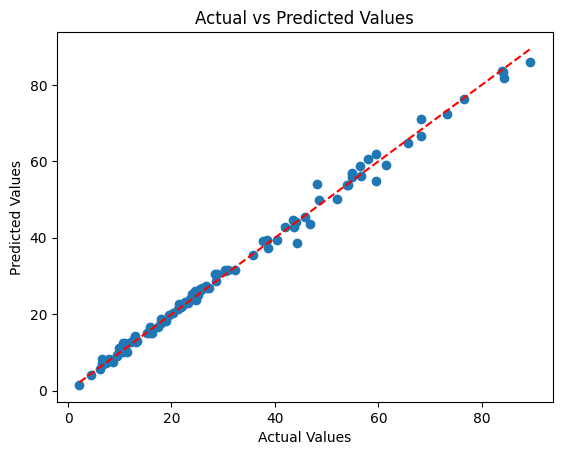

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)

# Add a diagonal line representing perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

# Set the title and axis labels
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Show the plot
plt.show()

In [ ]:
from prettytable import PrettyTable

# Get the actual and predicted values of y for the test data
y_test = np.array(y_test)
y_pred = np.array(y_pred) 

# Calculate the difference (error) between the actual and predicted values
error = y_test - y_pred

# Create a pretty table to display the actual, predicted, and error values
table = PrettyTable()
table.field_names = ["Actual", "Predicted", "Error"]

# Add the data to the table
for i in range(len(y_test)):
    table.add_row([round(y_test[i], 2), round(y_pred[i], 2), round(error[i], 2)])

# Print the table
print(table)


+--------+-----------+-------+
| Actual | Predicted | Error |
+--------+-----------+-------+
|  84.0  |   83.54   |  0.46 |
|  32.2  |   31.68   |  0.52 |
|  13.4  |   13.02   |  0.38 |
|  10.0  |   10.97   | -0.97 |
|  42.0  |    42.7   |  -0.7 |
|  22.0  |   22.06   | -0.06 |
|  21.9  |   22.02   | -0.12 |
|  48.5  |   49.93   | -1.43 |
|  22.6  |   23.07   | -0.47 |
|  25.9  |   26.89   | -0.99 |
|  37.7  |   39.19   | -1.49 |
|  28.8  |   30.46   | -1.66 |
|  19.0  |   18.11   |  0.89 |
|  7.6   |    7.62   | -0.02 |
|  76.6  |   76.34   |  0.26 |
|  11.1  |   11.41   | -0.31 |
|  8.7   |    7.45   |  1.25 |
|  44.2  |   38.57   |  5.63 |
|  9.5   |    8.97   |  0.53 |
|  18.0  |   18.81   | -0.81 |
|  43.5  |   44.52   | -1.02 |
|  18.1  |   17.95   |  0.15 |
|  27.2  |   26.88   |  0.32 |
|  24.6  |   24.64   | -0.04 |
|  24.0  |   24.23   | -0.23 |
|  65.8  |   64.88   |  0.92 |
|  23.1  |   23.29   | -0.19 |
|  9.9   |   11.21   | -1.31 |
|  15.8  |   16.73   | -0.93 |
|  6.6  

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Assuming X is the independent variables and y is the dependent variable in your normalized dataframe df_normalized
X = df_normalized.drop(['crown_disp'], axis=1)
y = df_normalized['crown_disp']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the ANN model
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a pipeline with StandardScaler and KerasRegressor
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=create_model, epochs=100, batch_size=10, verbose=0)))
pipeline = Pipeline(estimators)

# Define the hyperparameters to tune
param_grid = {
    'mlp__batch_size': [10, 20, 30],
    'mlp__epochs': [50, 100, 150]
}

# Use GridSearchCV to find the best hyperparameters
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)
grid_result = grid.fit(X_train, y_train)

# Print the best hyperparameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Extract the weights and biases of the trained neural network
weights = grid_result.best_estimator_.named_steps['mlp'].model.get_weights()

# Extract the weights and biases for each layer
W1, b1, W2, b2, W3, b3 = weights

# Define the activation function
def relu(x):
    return np.maximum(0, x)

# Define the model equation
def predict(X):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = relu(Z2)
    y_pred = np.dot(A2, W3) + b3
    return y_pred

# Use the model equation to make predictions on the test data
y_pred = predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
pi = 100 * (1 - np.sqrt(mean_squared_error(y_test, y_pred))/np.mean(y_test))
bf = np.mean(y_pred)/np.mean(y_test)
rpd = 100 * np.mean((y_test - y_pred) / np.mean(y_test))
mbe = np.mean(y_test - y_pred)
wilmott = 1 - np.sum((y_test - y_pred)**2) / np.sum((np.abs(y_pred - np.mean(y_test)) + np.abs(y_test - np.mean(y_test)))**2)
lm_range = np.max(y_test) - np.min(y_test)
lmcc_range = np.sum(np.abs(y_pred - np.mean(y_test))) + np.sum(np.abs(y_test - np.mean(y_test)))
gpi = 1 - (lmcc_range / lm_range)
ns = 1 - np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2)
vaf = (1 - np.var(y_test - y_pred) / np.var(y_test)) * 100
nmbe = np.mean((y_test - y_pred) / np.mean(y_test))
r2_score = r2_score(y_test, y_pred)

<ipython-input-22-888b615657eb>:30: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimators.append(('mlp', KerasRegressor(build_fn=create_model, epochs=100, batch_size=10, verbose=0)))
